# KNN 
## Lazy learner algo
### Given a data point
Calculate distance form all other data points

Get the closest K points

Get average of values

Get the labels with majority vote

In [2]:
import numpy as np

As we can see, distance measures play an important role in machine learning. Perhaps four of the most commonly used distance measures in machine learning are as follows:

#### Hamming Distance:used for one-hot encoded strings

#### Euclidean Distance:used for real valued vectos

#### Manhattan Distance:more useful to vectors that describe objects on a uniform grid, like a chessboard or city blocks


# The Hamming distance 
is a metric used in information theory to measure how much two messages with the same length differ.

The Hamming distance indicates the number of different digits/letters in a pair of messages. Take the words "Hamming" and "humming": what is the Hamming distance?

Let's see. "Hamming" and "humming" — there is one letter of difference, so the Hamming distance is 1.
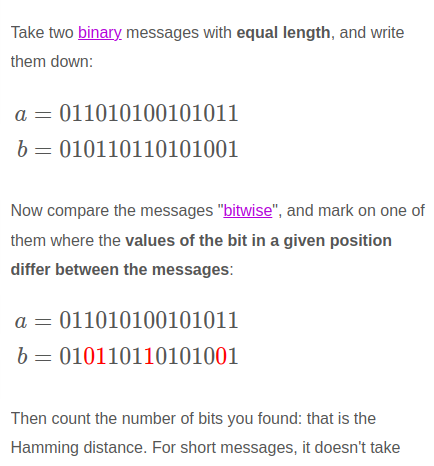

In [13]:
def hammingDist(a, b):
 return sum(abs(e1 - e2) for e1, e2 in zip(a, b))

In [14]:
x = [0, 0, 0, 0, 0, 1]
y = [0, 0, 0, 0, 1, 0]
print(hammingDist(x, y))

2


# Euclidean Distance
Euclidean distance calculates the distance between two real-valued vectors.
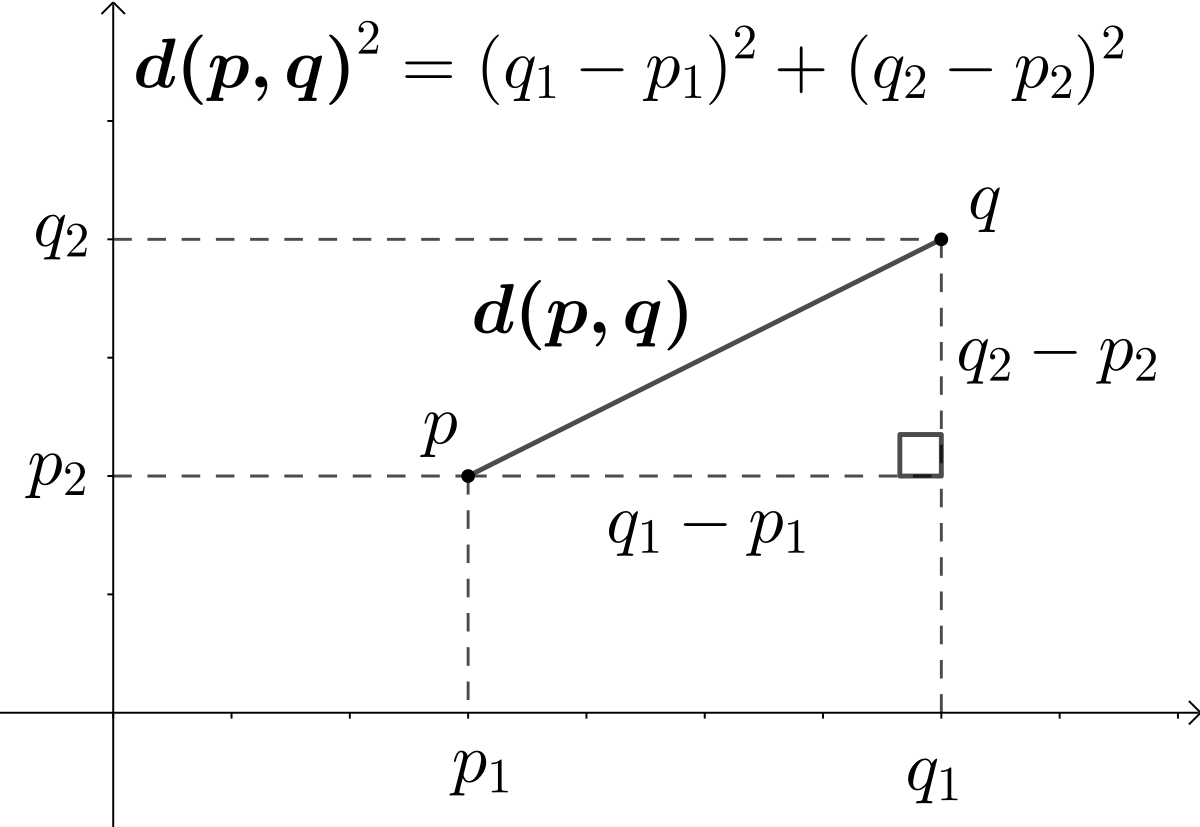

In [113]:
def euclideanDist(x,x1):
    return np.sqrt(np.sum((x-x1)**2))

In [115]:
print(euclideanDist(np.array([0,0]),np.array([2,2])))
print(euclideanDist(np.array([2,2]),np.array([4,4])))

2.8284271247461903
2.8284271247461903


# Manhattan Distance
The distance between two points measured along axes at right angles.
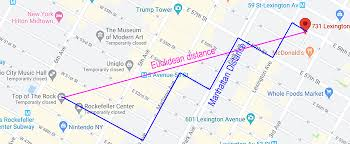

In [15]:
def manhattanDist(a, b):
 return sum(abs(e1-e2) for e1, e2 in zip(a,b))

In [17]:
# define data
row1 = [10, 20]
row2 = [12, 24]
# calculate distance
dist = manhattanDist(row1, row2)
print(dist)

6


# CALCULATING K NEAREST NEIGHBOURS

In [66]:
def findMostCommonLabel(x):
    temp={}
    for i in x:
        if i in temp:
            temp[i]=temp[i]+1
        else:
            temp[i]=1
    return max(temp, key=temp.get)
def knn(x,X_train,y_train,k,debug=False):
    distances= [euclideanDist(x,y) for y in X_train]
    if debug:
        for i in range(len(distances)):
            print(x,"is",round(distances[i],1),"unit distant from",X_train[i])
        print(k,"Nearest neighbours are: ")
    NearestIndices=np.argsort(distances)
    #here we got the values sorted in ascending and coverted to original indices
    #print(NearestIndices)
    KNearestIndices=NearestIndices[:k]
    corespondingLabel=[]
    for i in KNearestIndices:
        corespondingLabel.append(y_train[i])
        if debug:
            print(X_train[i])
    mostCommonLabel=findMostCommonLabel(corespondingLabel)
    return mostCommonLabel

In [67]:
print("Predicted class",knn([3,2],[[0,0],[3,3],[6,6]],[1,2,1],2,True))

[3, 2] is 3.6 unit distant from [0, 0]
[3, 2] is 1.0 unit distant from [3, 3]
[3, 2] is 5.0 unit distant from [6, 6]
2 Nearest neighbours are: 
[3, 3]
[0, 0]
Predicted class 2


In [64]:
findMostCommonLabel([1,2,1])

1

In [121]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris=datasets.load_iris()
X,y=iris.data,iris.target

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

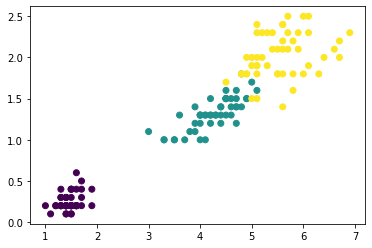

In [123]:
plt.figure()
plt.scatter(X[:,2],X[:,3], c=y)
plt.show()


In [149]:
predicted=[]
for i in X_test:
    #For k=3
    predicted.append(knn(i,X_train,y_train,3,debug=False))

In [136]:
import pandas as pd
data = {'Predicted': predicted, 'True Labels': y_test}
df = pd.DataFrame(data)
df

,Predicted,True Labels
0,1,1
1,1,1
2,2,2
3,0,0
4,1,1
5,0,0
6,0,0
7,0,0
8,1,1
9,2,2


In [148]:
acc=np.sum([predicted==y_test])/len(predicted)
acc*100

100.0

In [142]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predicted,y_test)
cm

array([[ 9,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  8]])

# Using Library

In [153]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [154]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 9,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  8]])

In [156]:
accuracy_score(y_test, y_pred)*100

100.0

In [181]:
from sklearn.model_selection import cross_val_score

# creating list of K for KNN
k_list = list(range(1,50))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
cv_scores

[0.9416666666666667,
 0.9333333333333332,
 0.95,
 0.925,
 0.95,
 0.95,
 0.9583333333333333,
 0.9583333333333333,
 0.9666666666666666,
 0.9583333333333333,
 0.9666666666666666,
 0.975,
 0.9666666666666666,
 0.9666666666666666,
 0.9583333333333333,
 0.9666666666666666,
 0.9583333333333333,
 0.9583333333333333,
 0.9583333333333333,
 0.9583333333333333,
 0.95,
 0.9416666666666667,
 0.9416666666666667,
 0.9333333333333333,
 0.925,
 0.9416666666666667,
 0.95,
 0.9583333333333333,
 0.9416666666666667,
 0.9333333333333333,
 0.925,
 0.9333333333333332,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.925,
 0.925,
 0.9166666666666666,
 0.9083333333333334,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9083333333333334,
 0.8916666666666666,
 0.9,
 0.8916666666666666,
 0.9]

<Figure size 432x288 with 0 Axes>

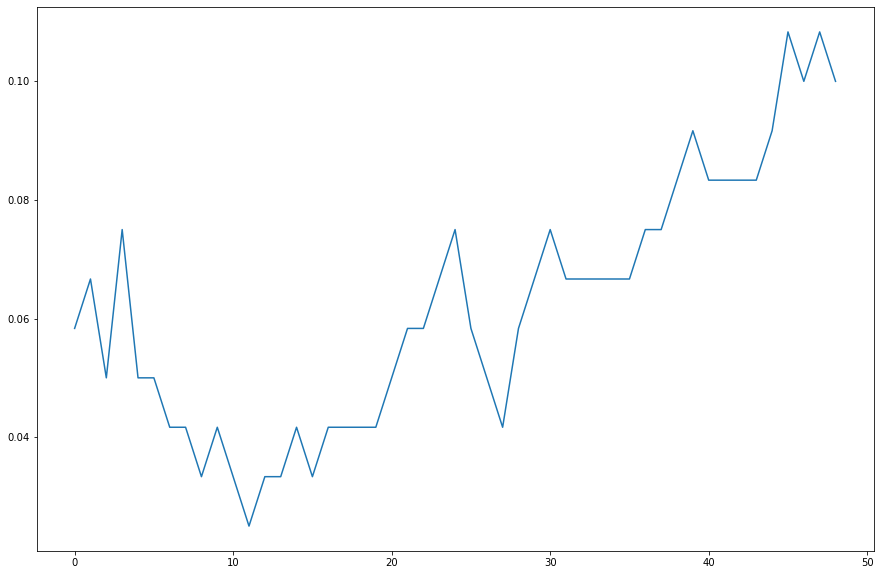

In [182]:
plt.figure()
plt.figure(figsize=(15,10))
# For errors
plt.plot([1-x for x in cv_scores])
plt.show()

In [183]:
mse=[1-x for x in cv_scores]
mse.index(min(mse))

11

### so optimal k is 11 for iris

In [184]:
cv_scores[mse.index(min(mse))]

0.975